Analysis
The total number of mice tested is 248. The percentage between male and female mice was 51%(male) and 49%(female). Overall, there was a lot to analyze from this data set. A first major conclusion drawn is how far ahead the drugs Capomulin and Ramicane were in its tumor volume average for the mice induced with those treatments. Both of those drugs means were around 40 (mm3), the median was also around 40(Capomulin) and 41(Ramicane). Both of these drugs also had the lowest standard deviation of all drug treatments, indicating that the values were relatively close to the mean. As we look at the bar charts, we also see that among the 10 drugs, Capomulin and Ramicane had the highest numbers of mice tested with Capomulin standing slightly higher than Ramicane in the count. This again indicates that compared to the other drugs, these two treatments have been tested the most and so its data from results can be better trusted. 

In [389]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [390]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [391]:
#Read mouse metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [392]:
#Read study results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [393]:
#merge data
combined_mice_df = pd.merge(study_results, mouse_metadata , how='outer', on='Mouse ID')
combined_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [394]:
#Number of Mice
number_of_Mice = combined_mice_df['Mouse ID'].nunique()
number_of_Mice

249

In [395]:
#Determine the duplicate 
mice_dup = combined_mice_df.loc[combined_mice_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
mice_dup

861    g989
863    g989
865    g989
867    g989
869    g989
Name: Mouse ID, dtype: object

In [396]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_data_df = combined_mice_df[combined_mice_df['Mouse ID'].isin(mice_dup)==False]
clean_mice_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [397]:
# Checking the number of mice in the clean DataFrame.
mice_number = clean_mice_data_df['Mouse ID'].nunique()
mice_number

248

Summary Statistics

In [398]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_regimen = clean_mice_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_regimen = clean_mice_data_df.groupby('Drug Regimen')[ 'Tumor Volume (mm3)'].median()
variance_regimen = clean_mice_data_df.groupby('Drug Regimen')[ 'Tumor Volume (mm3)'].var()
std_regimen = clean_mice_data_df.groupby('Drug Regimen')[ 'Tumor Volume (mm3)'].std()
sem_regimen = clean_mice_data_df.groupby('Drug Regimen')[ 'Tumor Volume (mm3)'].sem()


In [399]:
mean_regimen.head()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Name: Tumor Volume (mm3), dtype: float64

In [400]:
#Printing it into a Dataframe
regimen_summary = pd.DataFrame({"Tumor Volume Mean": mean_regimen,
                                "Tumor Volume Median": median_regimen,
                                 "Tumor Volume Variance": variance_regimen,
                                  "Tumor Volume STD": std_regimen,
                                  "Tumor Volume SEM": sem_regimen})

regimen_summary

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [401]:
#aggregation method
agg_summary = clean_mice_data_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


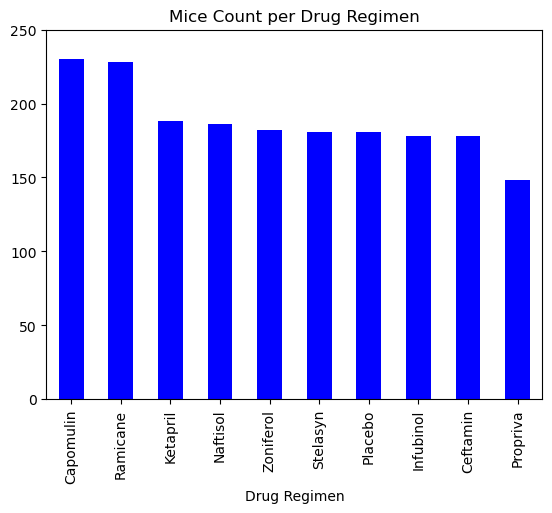

In [404]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_per_drug = clean_mice_data_df['Drug Regimen'].value_counts()
mice_bar_chart = mice_per_drug.plot(kind='bar', color='b')
plt.title("Mice Count per Drug Regimen")

plt.ylim(0,250)
plt.show()

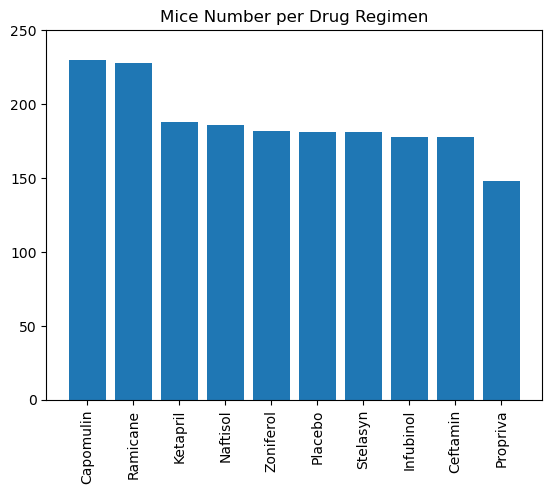

In [ ]:
#Generate bar chart using MatplotLib
mice_per_drug = clean_mice_data_df['Drug Regimen'].value_counts()
plt.bar(mice_per_drug.index, mice_per_drug.values, )
plt.xticks(rotation=90)
plt.ylim(0,250)
plt.title('Mice Number per Drug Regimen')
plt.show()

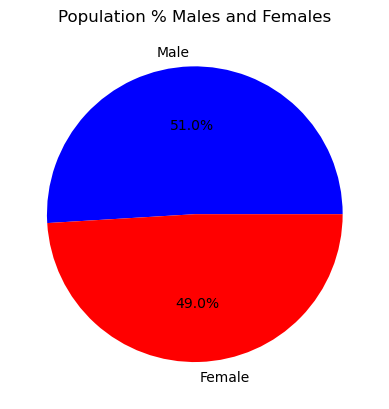

In [ ]:
#Pie Chart MatPlotlib
mice_gender_count = clean_mice_data_df['Sex'].value_counts()

plt.pie(mice_gender_count, labels=mice_gender_count.index, colors=['Blue', 'red'], autopct='%1.1f%%')
plt.title("Population % Males and Females")
plt.show()

<Axes: title={'center': 'Population % of Males and Females'}, ylabel='count'>

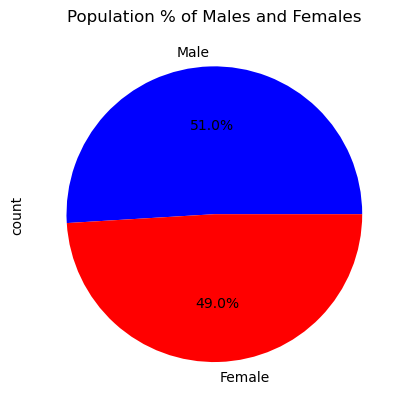

In [ ]:
#Pie Chart Pandas
plot_pie = mice_gender_count.plot.pie(autopct='%1.1f%%', colors=['blue', 'red'])
plt.title("Population % of Males and Females")
plot_pie

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_max = clean_mice_data_df.groupby(['Mouse ID'],as_index=False)['Timepoint'].max()
timepoint_max 


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merge =pd.merge(clean_mice_data_df, timepoint_max, on=['Mouse ID', 'Timepoint'], how='left')
new_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes   # add subset 
    cd = new_merge.loc[new_merge['Drug Regimen']==drug,'Tumor Volume (mm3)']
    tumor_vol_data.append(cd)
  

    
    # Determine outliers using upper and lower bounds
    quartiles = cd.quantile ([.25,.5,.75])
quartiles

0.25    47.208427
0.50    51.776157
0.75    56.801438
Name: Tumor Volume (mm3), dtype: float64

In [ ]:
#iqr
iqr=quartiles[.75]-quartiles[.25]
lower_bound = quartiles[.25]-(1.5*iqr)
upper_bound = quartiles[.75]+(1.5*iqr)
outlier = cd.loc[(cd < lower_bound) | (cd > upper_bound)]
print(f"{drug} outlier: {outlier}")


Ceftamin outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Distribution of Tumor Volume Each Treatment')

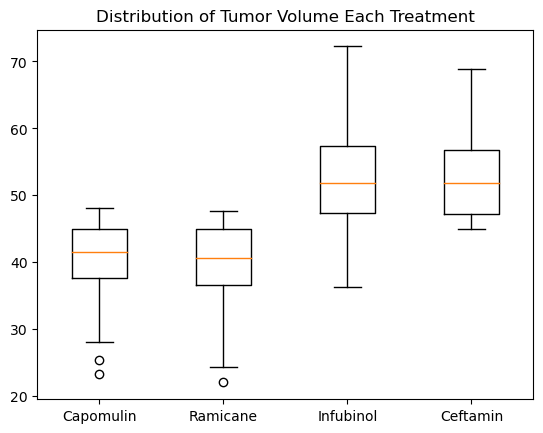

In [430]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments_list)
plt.title('Distribution of Tumor Volume Each Treatment')

<function matplotlib.pyplot.show(close=None, block=None)>

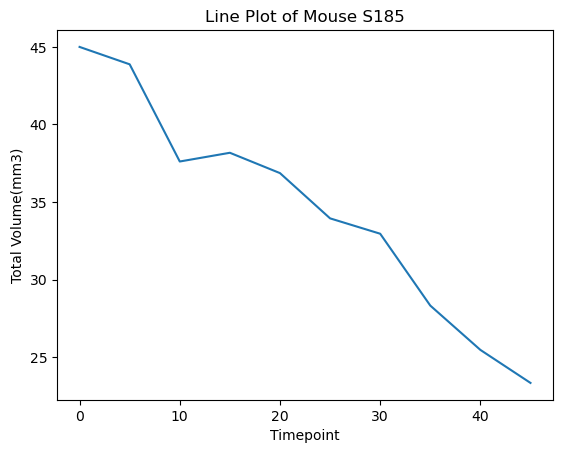

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_search = clean_mice_data_df.loc[clean_mice_data_df['Drug Regimen'] == 'Capomulin',:]
line_plot = capomulin_search.loc[capomulin_search['Mouse ID'] == 's185']
xaxis = line_plot['Timepoint']
yaxis = line_plot['Tumor Volume (mm3)']
plt.plot(xaxis,yaxis)
plt.title('Line Plot of Mouse S185' )
plt.xlabel('Timepoint')
plt.ylabel('Total Volume(mm3)')
plt.show

Text(0.5, 1.0, 'Mouse Weight vs Average Observed Tumor Volume')

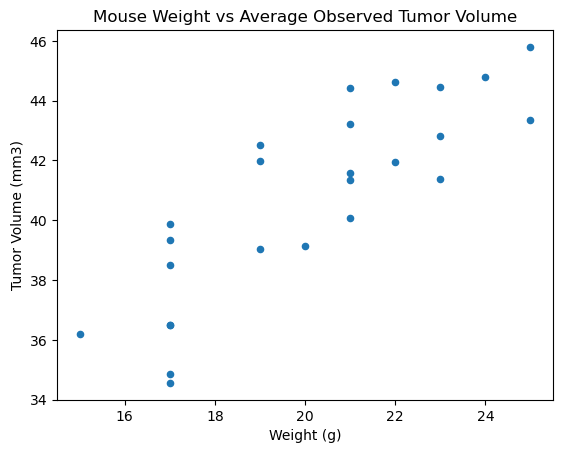

In [ ]:
#Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_search.groupby(['Mouse ID']).agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
plt.title("Mouse Weight vs Average Observed Tumor Volume")

In [409]:
data = capomulin_search.groupby(['Mouse ID']).agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})
data.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [419]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(data['Weight (g)'], data['Tumor Volume (mm3)'])
correlation

PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712605e-07)